<a href="https://colab.research.google.com/github/HuuskoJ/MNIST-CNN/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST
This is an example how to get over 98 % accuracy on the hand-written digit (MNIST) dataset using convolutional neural network.

Only one epoch is needed to achieve this accuracy.

## Import dependencies and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, ReLU, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data and reshape it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)

(60000, 28, 28, 1)


## Build and train model

After every convolution layer data is normalized, ReLU activation is applied and then max pooled.

<figure>
<center>
<img src='https://lh3.google.com/u/0/d/16Ndz1YF3mYMlCStOAFtPj4yOaXiP07wc=w1280-h1306-iv1' />
<figcaption> Model architechture </figcaption></center>
</figure>



In [2]:
# Initialize model
model = Sequential()
# Input (1st) layer 
model.add(Conv2D(8, (5,5), padding='same', activation='linear', input_shape=(28,28, 1)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(padding='same'))
# 2nd layer
model.add(Conv2D(8, (5,5), padding='same',activation='linear'))
model.add(BatchNormalization())
model.add(ReLU())
# 3rd layer
model.add(Conv2D(8, (5,5), padding='same',activation='linear'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(padding='same'))
# Flatten
model.add(Flatten())
# 4th layer
model.add(Dense(64, activation='relu'))
# 5th layer
model.add(Dense(32, activation='relu'))
# Output (6th) layer
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy'])
# Train model on training data
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    validation_data=[x_test, y_test])

W0822 17:19:08.552001 140555232974720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.1755 - categorical_accuracy: 0.9455 - val_loss: 0.0817 - val_categorical_accuracy: 0.9730
Epoch 2/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0642 - categorical_accuracy: 0.9801 - val_loss: 0.0515 - val_categorical_accuracy: 0.9825
Epoch 3/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0467 - categorical_accuracy: 0.9852 - val_loss: 0.0479 - val_categorical_accuracy: 0.9837
Epoch 4/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0391 - categorical_accuracy: 0.9876 - val_loss: 0.0327 - val_categorical_accuracy: 0.9899
Epoch 5/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0339 - categorical_accuracy: 0.9890 - val_loss: 0.0345 - val_categorical_accuracy: 0.9885


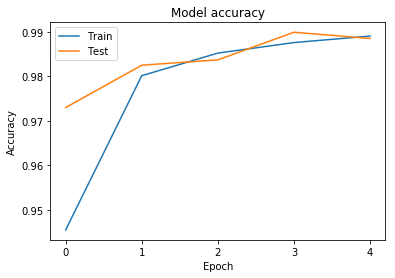

Loss: 0.0345 Accuracy: 98.85 %


In [3]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(5))
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {loss:.4f} Accuracy: {accuracy * 100 :.2f} %')

## Test model with random samples

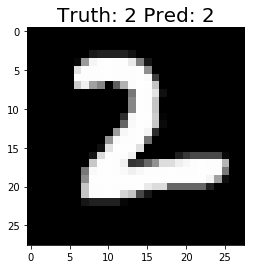

In [5]:
rand = np.random.randint(0,len(x_test)-1)
sample = x_test[rand]
truth = np.argmax(y_test[rand])
sample = sample.reshape(28,28) 
pred_sample = sample.reshape(1,28, 28, 1)
pred = np.argmax(model.predict(pred_sample))
plt.title(f'Truth: {truth} Pred: {pred}', fontsize=20)
plt.imshow(sample, cmap='Greys_r')
plt.grid(False)
plt.show()


## Summary of the model

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 8)         32        
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1608      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 14, 14, 8)         0